In [2]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# sklearn :: models
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals import joblib

sns.set_style('whitegrid')

In [172]:
#input
cancellations = pd.read_csv('C:/Users/charl/Documents/cancellations.csv')
delays = pd.read_csv('C:/Users/charl/Documents/delays.csv')


In [173]:
print(cancellations.columns)
cancellations.head()

Index(['Unnamed: 0', 'CANCELLED', 'MONTH', 'DAY_OF_WEEK', 'AIRLINE',
       'SCHEDULED_DEPARTURE', 'SCHEDULED_TIME', 'SCHEDULED_ARRIVAL'],
      dtype='object')


,Unnamed: 0,CANCELLED,MONTH,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_TIME,SCHEDULED_ARRIVAL
0,33,1,1,4,AS,135,205,600
1,43,1,1,4,AA,200,120,500
2,69,1,1,4,OO,510,87,637
3,83,1,1,4,MQ,525,95,700
4,91,1,1,4,OO,530,90,700


In [77]:
cancellations1=pd.concat([cancellations, pd.get_dummies(cancellations['AIRLINE'])], axis=1)
cancellations1.isnull().any()

Unnamed: 0             False
CANCELLED              False
MONTH                  False
DAY_OF_WEEK            False
AIRLINE                False
SCHEDULED_DEPARTURE    False
SCHEDULED_TIME         False
SCHEDULED_ARRIVAL      False
AA                     False
AS                     False
B6                     False
DL                     False
EV                     False
F9                     False
HA                     False
MQ                     False
NK                     False
OO                     False
UA                     False
US                     False
VX                     False
WN                     False
dtype: bool

In [79]:
cancellations1.describe()

,Unnamed: 0,CANCELLED,MONTH,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,SCHEDULED_ARRIVAL,AA,AS,B6,...,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
count,1.797580e+05,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,...,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000,179758.000000
mean,2.548943e+06,0.500000,5.793177,3.747505,1351.396639,133.188092,1507.969859,0.123472,0.018892,0.046240,...,0.133780,0.011065,0.007460,0.108451,0.020750,0.106521,0.080492,0.039475,0.008155,0.198344
std,1.772705e+06,0.500001,3.574507,2.064258,492.424176,70.511836,517.520460,0.328979,0.136144,0.210005,...,0.340417,0.104606,0.086049,0.310950,0.142547,0.308504,0.272053,0.194723,0.089939,0.398754
min,1.600000e+01,0.000000,1.000000,1.000000,1.000000,20.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.880972e+05,0.000000,2.000000,2.000000,920.000000,82.000000,1108.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.381798e+06,0.500000,5.000000,4.000000,1350.000000,115.000000,1537.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.016126e+06,1.000000,9.000000,6.000000,1753.000000,164.000000,1935.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.819070e+06,1.000000,12.000000,7.000000,2359.000000,705.000000,2359.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [174]:
delays1=pd.concat([delays, pd.get_dummies(delays['AIRLINE'])], axis=1)
delays1.isnull().any()


Unnamed: 0             False
ARRIVAL_DELAY          False
MONTH                  False
DAY_OF_WEEK            False
AIRLINE                False
SCHEDULED_DEPARTURE    False
SCHEDULED_TIME         False
SCHEDULED_ARRIVAL      False
ANYDELAY               False
DELAY15                False
DELAY30                False
AA                     False
AS                     False
B6                     False
DL                     False
EV                     False
F9                     False
HA                     False
MQ                     False
NK                     False
OO                     False
UA                     False
US                     False
VX                     False
WN                     False
dtype: bool

In [175]:
delays1.describe()

,Unnamed: 0,ARRIVAL_DELAY,MONTH,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ANYDELAY,DELAY15,DELAY30,...,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
count,1.800000e+05,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,2.828976e+06,21.790756,6.361544,3.901722,1374.377122,138.191822,1535.239722,0.666667,0.333333,0.198894,...,0.102444,0.018067,0.018411,0.047094,0.024078,0.109922,0.084200,0.036217,0.011539,0.227956
std,1.683679e+06,45.927189,3.402998,1.967168,473.107138,74.045441,502.974180,0.471406,0.471406,0.399170,...,0.303233,0.133193,0.134433,0.211841,0.153291,0.312794,0.277688,0.186829,0.106798,0.419515
min,5.700000e+01,0.000000,1.000000,1.000000,1.000000,18.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.363814e+06,0.000000,3.000000,2.000000,1000.000000,84.000000,1143.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.788752e+06,6.000000,6.000000,4.000000,1400.000000,120.000000,1600.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.256693e+06,23.000000,9.000000,5.000000,1750.000000,170.000000,1939.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.819039e+06,1971.000000,12.000000,7.000000,2359.000000,679.000000,2359.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Predicting Cancellations

In [81]:

# feature engineering
y_column = ['CANCELLED']
X_columns = ['MONTH','DAY_OF_WEEK','AA','AS','B6','DL','EV','F9','HA','MQ','NK','OO','UA','US','VX','WN','SCHEDULED_DEPARTURE','SCHEDULED_TIME','SCHEDULED_ARRIVAL']




In [82]:
# split the data

threshold = 0.8
X = cancellations1[X_columns]
y = cancellations1[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (143806, 19)
y_train (143806, 1)
X_test (35952, 19)
y_test (35952, 1)


In [83]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']
df_results = df_results.sort_values(by='precision', ascending=False)
df_results

MODEL Naive Bayes
[[ 4631 13536]
 [ 1499 16286]]
Precision 0.5461069009456107
Recall 0.9157154905819511

MODEL RandomForestClassifier10
[[13468  4699]
 [ 5630 12155]]
Precision 0.7211937818915392
Recall 0.6834411020522912
Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.216672
16  SCHEDULED_DEPARTURE  0.209784
17       SCHEDULED_TIME  0.199887
0                 MONTH  0.163949
1           DAY_OF_WEEK  0.096737

MODEL RandomForestClassifier100
[[13159  5008]
 [ 4723 13062]]
Precision 0.7228555617044826
Recall 0.7344391341017712
Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.215015
16  SCHEDULED_DEPARTURE  0.207749
17       SCHEDULED_TIME  0.199666
0                 MONTH  0.166933
1           DAY_OF_WEEK  0.094286

MODEL KNeighborsClassifier
[[11034  7133]
 [ 6349 11436]]
Precision 0.6158651515967473
Recall 0.6430137756536407

MODEL DecisionTreeClassifier
[[12098  6069]
 [ 5825 11960]]
Precision 0.6633756725275944
Recall 0.

,model,precision,recall
2,RandomForestClassifier100,0.722856,0.734439
1,RandomForestClassifier10,0.721194,0.683441
4,DecisionTreeClassifier,0.663376,0.672477
3,KNeighborsClassifier,0.615865,0.643014
0,Naive Bayes,0.546107,0.915715


In [84]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)

MODEL Naive Bayes


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL RandomForestClassifier10


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.

MODEL RandomForestClassifier100


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.

MODEL KNeighborsClassifier
MODEL DecisionTreeClassifier


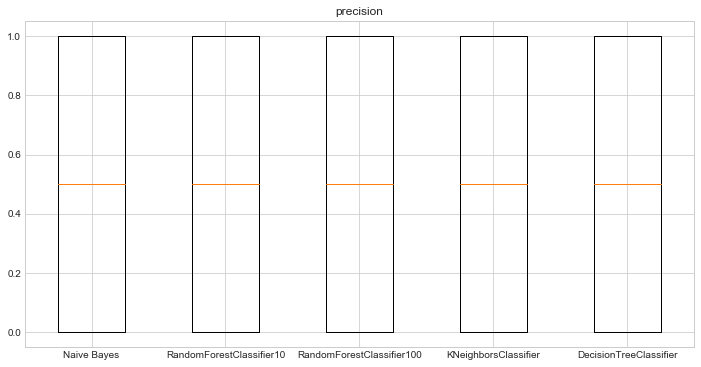

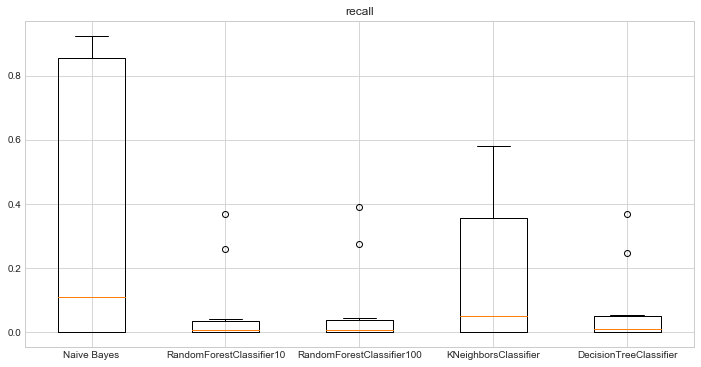

In [85]:
for metric in ['precision', 'recall']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

# Predicting Any Delay

In [86]:
# feature engineering
y_column = ['ANYDELAY']
X_columns = ['MONTH','DAY_OF_WEEK','AA','AS','B6','DL','EV','F9','HA','MQ','NK','OO','UA','US','VX','WN','SCHEDULED_DEPARTURE','SCHEDULED_TIME','SCHEDULED_ARRIVAL']

X_columns

['MONTH',
 'DAY_OF_WEEK',
 'AA',
 'AS',
 'B6',
 'DL',
 'EV',
 'F9',
 'HA',
 'MQ',
 'NK',
 'OO',
 'UA',
 'US',
 'VX',
 'WN',
 'SCHEDULED_DEPARTURE',
 'SCHEDULED_TIME',
 'SCHEDULED_ARRIVAL']

In [87]:
# split the data

threshold = 0.8
X = delays1[X_columns]
y = delays1[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (144000, 19)
y_train (144000, 1)
X_test (36000, 19)
y_test (36000, 1)


In [89]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']
df_results = df_results.sort_values(by='precision', ascending=False)
df_results

MODEL Naive Bayes
[[ 2961  9205]
 [ 4071 19763]]
Precision 0.6822355702844518
Recall 0.8291935889905178

MODEL RandomForestClassifier10
[[ 3776  8390]
 [ 6203 17631]]
Precision 0.6775681180584913
Recall 0.7397415456910296
Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.251441
16  SCHEDULED_DEPARTURE  0.239344
17       SCHEDULED_TIME  0.220828
1           DAY_OF_WEEK  0.124723
0                 MONTH  0.116563

MODEL RandomForestClassifier100
[[ 2564  9602]
 [ 3870 19964]]
Precision 0.6752350673070419
Recall 0.8376269195267265
Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.252408
16  SCHEDULED_DEPARTURE  0.237734
17       SCHEDULED_TIME  0.222890
1           DAY_OF_WEEK  0.122401
0                 MONTH  0.112754

MODEL KNeighborsClassifier
[[ 2949  9217]
 [ 4899 18935]]
Precision 0.6725987496447855
Recall 0.7944533020055383

MODEL DecisionTreeClassifier
[[ 4558  7608]
 [ 8102 15732]]
Precision 0.6740359897172237
Recall 0.

,model,precision,recall
0,Naive Bayes,0.682236,0.829194
1,RandomForestClassifier10,0.677568,0.739742
2,RandomForestClassifier100,0.675235,0.837627
4,DecisionTreeClassifier,0.674036,0.660065
3,KNeighborsClassifier,0.672599,0.794453


In [92]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]

k = 5
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)

MODEL Naive Bayes


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL RandomForestClassifier10


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL RandomForestClassifier100


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL KNeighborsClassifier


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL DecisionTreeClassifier


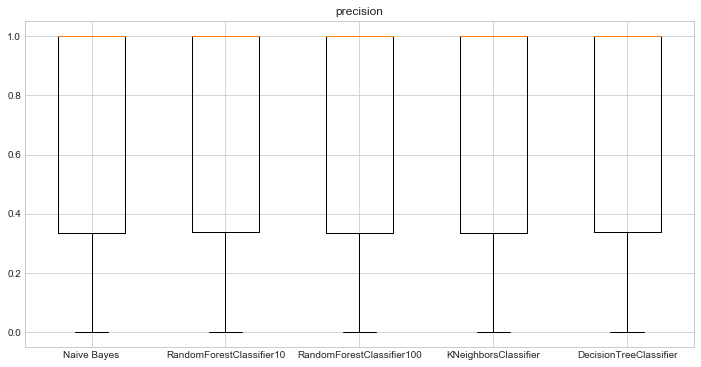

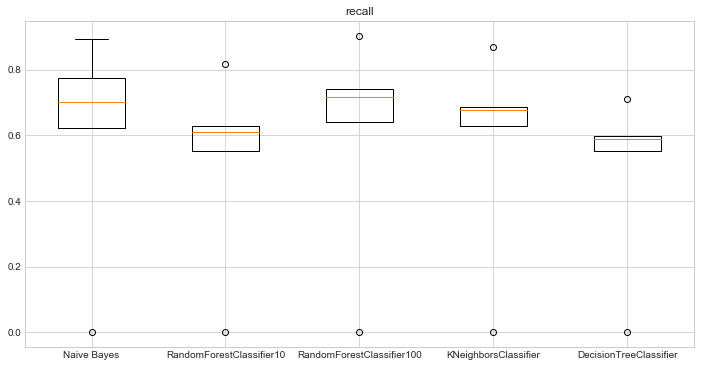

In [93]:
for metric in ['precision', 'recall']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

# Predicting a delay over 30 minutes (given that a delay is likely)

In [176]:
delays2 =  delays1[delays1['ANYDELAY']==1]
delays2.head()

,Unnamed: 0,ARRIVAL_DELAY,MONTH,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ANYDELAY,DELAY15,...,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
60000,2029528,13,5,6,US,1759,74,1913,1,0,...,0,0,0,0,0,0,0,1,0,0
60001,2932122,2,7,5,AA,1336,159,1715,1,0,...,0,0,0,0,0,0,0,0,0,0
60002,3459458,10,8,2,DL,35,242,737,1,0,...,0,0,0,0,0,0,0,0,0,0
60003,3434713,12,8,7,EV,1459,81,1620,1,0,...,1,0,0,0,0,0,0,0,0,0
60004,296309,14,1,2,EV,1225,104,1409,1,0,...,1,0,0,0,0,0,0,0,0,0


In [177]:
y_column = ['DELAY30']
X_columns = ['MONTH','DAY_OF_WEEK','AA','AS','B6','DL','EV','F9','HA','MQ','NK','OO','UA','US','VX','WN','SCHEDULED_DEPARTURE','SCHEDULED_TIME','SCHEDULED_ARRIVAL']

X_columns

['MONTH',
 'DAY_OF_WEEK',
 'AA',
 'AS',
 'B6',
 'DL',
 'EV',
 'F9',
 'HA',
 'MQ',
 'NK',
 'OO',
 'UA',
 'US',
 'VX',
 'WN',
 'SCHEDULED_DEPARTURE',
 'SCHEDULED_TIME',
 'SCHEDULED_ARRIVAL']

In [180]:

threshold = 0.8
X = delays2[X_columns]
y = delays2[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (96000, 19)
y_train (96000, 1)
X_test (24000, 19)
y_test (24000, 1)


In [181]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(confusion_matrix(y_test, y_pred))
    print('Precision', precision)
    print('Recall', recall)
    results.append([m[0], precision, recall])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'precision', 'recall']
df_results = df_results.sort_values(by='precision', ascending=False)
df_results

MODEL Naive Bayes
[[11971  4808]
 [ 4387  2834]]
Precision 0.37084532844805024
Recall 0.3924664173937128

MODEL RandomForestClassifier10
[[14710  2069]
 [ 5850  1371]]
Precision 0.398546511627907
Recall 0.18986289987536353
Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.254537
16  SCHEDULED_DEPARTURE  0.245247
17       SCHEDULED_TIME  0.239599
1           DAY_OF_WEEK  0.108236
0                 MONTH  0.098035

MODEL RandomForestClassifier100
[[14822  1957]
 [ 5890  1331]]
Precision 0.4048053527980535
Recall 0.18432350090015234
Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.257203
16  SCHEDULED_DEPARTURE  0.245003
17       SCHEDULED_TIME  0.239231
1           DAY_OF_WEEK  0.106128
0                 MONTH  0.098375

MODEL KNeighborsClassifier
[[14013  2766]
 [ 5771  1450]]
Precision 0.3439278937381404
Recall 0.20080321285140562

MODEL DecisionTreeClassifier
[[11912  4867]
 [ 4727  2494]]
Precision 0.33881266132318977
Recal

,model,precision,recall
2,RandomForestClassifier100,0.404805,0.184324
1,RandomForestClassifier10,0.398547,0.189863
0,Naive Bayes,0.370845,0.392466
3,KNeighborsClassifier,0.343928,0.200803
4,DecisionTreeClassifier,0.338813,0.345382


In [182]:
models = [
    ('Naive Bayes', GaussianNB()),
    ('RandomForestClassifier10', RandomForestClassifier(n_estimators=10)),
    ('RandomForestClassifier100', RandomForestClassifier(n_estimators=100)),
    ('KNeighborsClassifier', KNeighborsClassifier()),
    ('DecisionTreeClassifier', DecisionTreeClassifier())
]

k = 5
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'precision':[], 'recall':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        results[m[0]]['precision'].append(precision)
        results[m[0]]['recall'].append(recall)

MODEL Naive Bayes


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL RandomForestClassifier10


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL RandomForestClassifier100


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL KNeighborsClassifier


C:\Users\charl\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


MODEL DecisionTreeClassifier


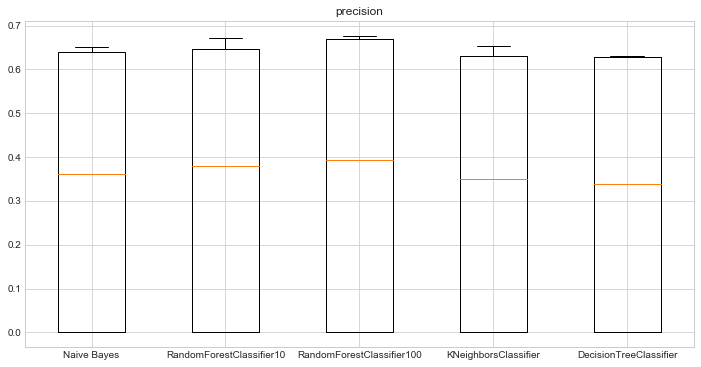

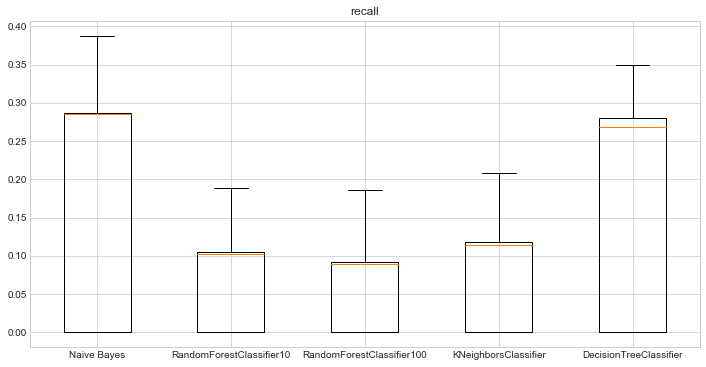

In [183]:
for metric in ['precision', 'recall']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

# Can we predict an arrival delay given that a delay is likely? prob not with this data...

In [187]:
delays3 = delays2[delays2['ANYDELAY']==1] 
delays3.head()

,Unnamed: 0,ARRIVAL_DELAY,MONTH,DAY_OF_WEEK,AIRLINE,SCHEDULED_DEPARTURE,SCHEDULED_TIME,SCHEDULED_ARRIVAL,ANYDELAY,DELAY15,...,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
60000,2029528,13,5,6,US,1759,74,1913,1,0,...,0,0,0,0,0,0,0,1,0,0
60001,2932122,2,7,5,AA,1336,159,1715,1,0,...,0,0,0,0,0,0,0,0,0,0
60002,3459458,10,8,2,DL,35,242,737,1,0,...,0,0,0,0,0,0,0,0,0,0
60003,3434713,12,8,7,EV,1459,81,1620,1,0,...,1,0,0,0,0,0,0,0,0,0
60004,296309,14,1,2,EV,1225,104,1409,1,0,...,1,0,0,0,0,0,0,0,0,0


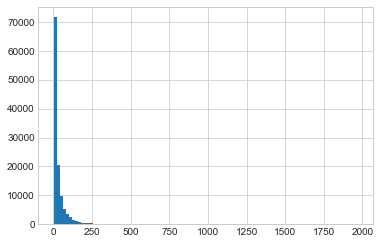

In [188]:
plt.hist(delays3['ARRIVAL_DELAY'], bins=100)
plt.show()

In [189]:
np.percentile(delays2['ARRIVAL_DELAY'],95) #so skewed...will truncate the top 5%

125.0

In [191]:
delays3 = delays2[delays2['ARRIVAL_DELAY'] < 125.0]

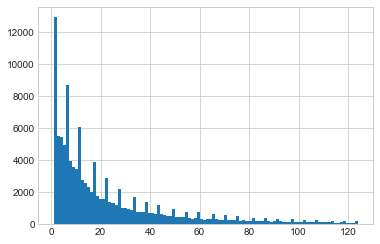

In [192]:
plt.hist(delays3['ARRIVAL_DELAY'], bins=100)
plt.show() #looks like they rounded to the 5 minute (below)

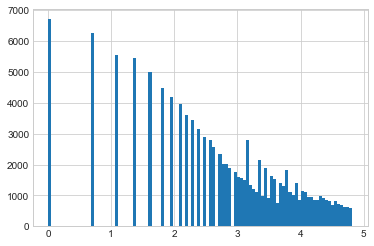

In [193]:
logdelay = np.log(delays3['ARRIVAL_DELAY'])
plt.hist(logdelay, bins=100)
plt.show()  #a bit less horrible but still horrible

In [194]:
y_column = ['ARRIVAL_DELAY']  #will just run models on raw arrival delay values
X_columns = ['MONTH','DAY_OF_WEEK','AA','AS','B6','DL','EV','F9','HA','MQ','NK','OO','UA','US','VX','WN','SCHEDULED_DEPARTURE','SCHEDULED_TIME','SCHEDULED_ARRIVAL']

X_columns

['MONTH',
 'DAY_OF_WEEK',
 'AA',
 'AS',
 'B6',
 'DL',
 'EV',
 'F9',
 'HA',
 'MQ',
 'NK',
 'OO',
 'UA',
 'US',
 'VX',
 'WN',
 'SCHEDULED_DEPARTURE',
 'SCHEDULED_TIME',
 'SCHEDULED_ARRIVAL']

In [195]:

threshold = 0.8
X = delays3[X_columns]
y = delays3[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (91172, 19)
y_train (91172, 1)
X_test (22794, 19)
y_test (22794, 1)


In [159]:
model = sm.GLM(y_train, X_train, family=sm.families.Gamma(link = sm.genmod.families.links.log)).fit()
model.fit(X)
print model.summary()  #I don't know how to run a log-gamma regression in python but I think it would be most appropriate here

SyntaxError: invalid syntax (<ipython-input-159-457b3fae741e>, line 3)

MODEL RandomForestRegressor10
MAE 20.462309426666167
RMSE 27.5816640244525


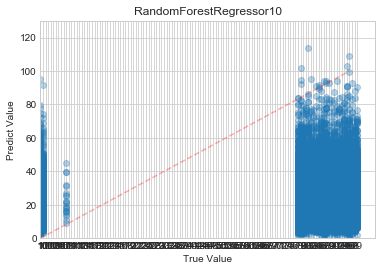

Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.233820
17       SCHEDULED_TIME  0.222280
16  SCHEDULED_DEPARTURE  0.221052
1           DAY_OF_WEEK  0.123169
0                 MONTH  0.090448

MODEL RandomForestRegressor100
MAE 19.948764004976624
RMSE 26.67335159414814


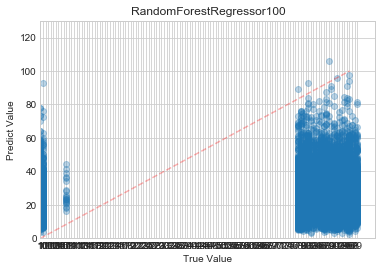

Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.233619
16  SCHEDULED_DEPARTURE  0.223145
17       SCHEDULED_TIME  0.221194
1           DAY_OF_WEEK  0.123139
0                 MONTH  0.091138

MODEL KNeighborsRegressor
MAE 20.49961393349127
RMSE 27.888453306869387


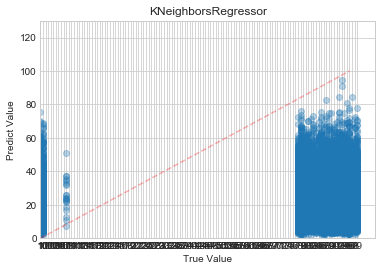


MODEL DecisionTreeRegressor
MAE 25.61402123365798
RMSE 36.73740361682456


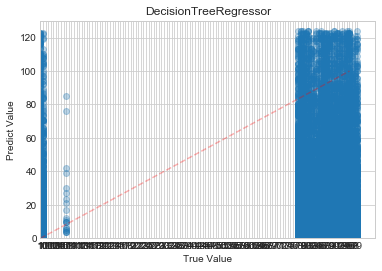

Feature Importance
                      0         1
18    SCHEDULED_ARRIVAL  0.233080
17       SCHEDULED_TIME  0.225157
16  SCHEDULED_DEPARTURE  0.224763
1           DAY_OF_WEEK  0.134679
0                 MONTH  0.087351



,model,mae,rmse
1,RandomForestRegressor100,19.948764,26.673352
0,RandomForestRegressor10,20.462309,27.581664
2,KNeighborsRegressor,20.499614,27.888453
3,DecisionTreeRegressor,25.614021,36.737404


In [196]:
models = [#I don't think linear regression is suited for such a skewed distribution
    
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]
results = []
for m in models:
    print('MODEL', m[0])
    model = m[1]
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print('MAE', mae)
    print('RMSE', rmse)
    # print the chart
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot(range(0, 130, 100), range(0, 130, 100), '--r', alpha=0.3, label='Line1')
    plt.title(m[0])
    plt.xlabel('True Value')
    plt.ylabel('Predict Value')
    plt.xlim([0, 130])
    plt.ylim([0, 130])
    plt.show()
    results.append([m[0], mae, rmse])
    
    # if there is a feature importance, print top 5
    importance = []
    if hasattr(model, 'feature_importances_'):
        print('Feature Importance')
        importance = []
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.feature_importances_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
    elif hasattr(model, 'coef_'):
        print('Feature Importance')
        for i in range(len(X_columns)):
            importance.append([X_columns[i], model.coef_[i]])
        print(pd.DataFrame(importance).sort_values(by=1, ascending=False).head())
        
    print('')

# sort the results and print as a table
df_results = pd.DataFrame(results)
df_results.columns = ['model', 'mae', 'rmse']
df_results = df_results.sort_values(by='mae')
df_results

In [197]:
models = [
    ('LinearRegression', LinearRegression()),
    ('RandomForestRegressor10', RandomForestRegressor(n_estimators=10)),
    ('RandomForestRegressor100', RandomForestRegressor(n_estimators=100, n_jobs=4)),
    ('KNeighborsRegressor', KNeighborsRegressor()),
    ('DecisionTreeRegressor', DecisionTreeRegressor())
]

k = 10
results = {}
for m in models:
    print('MODEL', m[0])
    results[m[0]] = {'mae':[], 'rmse':[]}
    kf = KFold(n_splits=k)
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.values[train_index], X.values[test_index]
        y_train, y_test = y.values[train_index], y.values[test_index]
        model = m[1]
        model.fit(X_train, y_train.ravel())
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[m[0]]['mae'].append(mae)
        results[m[0]]['rmse'].append(rmse)

MODEL LinearRegression
MODEL RandomForestRegressor10
MODEL RandomForestRegressor100
MODEL KNeighborsRegressor
MODEL DecisionTreeRegressor


In [ ]:
for metric in ['mae', 'rmse']:
    values = []
    labels = []
    for model, result_values in results.items():
        for m, v in result_values.items():
            if m == metric:
                labels.append(model)
                values.append(v)
    plt.figure(figsize=(12,6))
    plt.title(metric)
    plt.boxplot(values)
    plt.xticks(range(1, len(labels)+1), labels, rotation='horizontal')
    plt.show()

In [7]:
testingvec=X_test[1,:]

testingvec

SyntaxError: invalid syntax (<ipython-input-7-dcdab13008d6>, line 1)

In [5]:

model = joblib.load('C:/Users/charl/Desktop/Big Data 1260/BDAproject/TO SUBMIT/data_app_ank/model/cancellationrf.pkl')
modelfit=model.fix(testingvec)
cancprob=model.predict_proba(input)
scored_flight=cancprob[0,0]
scored_flight

NameError: name 'X_test' is not defined